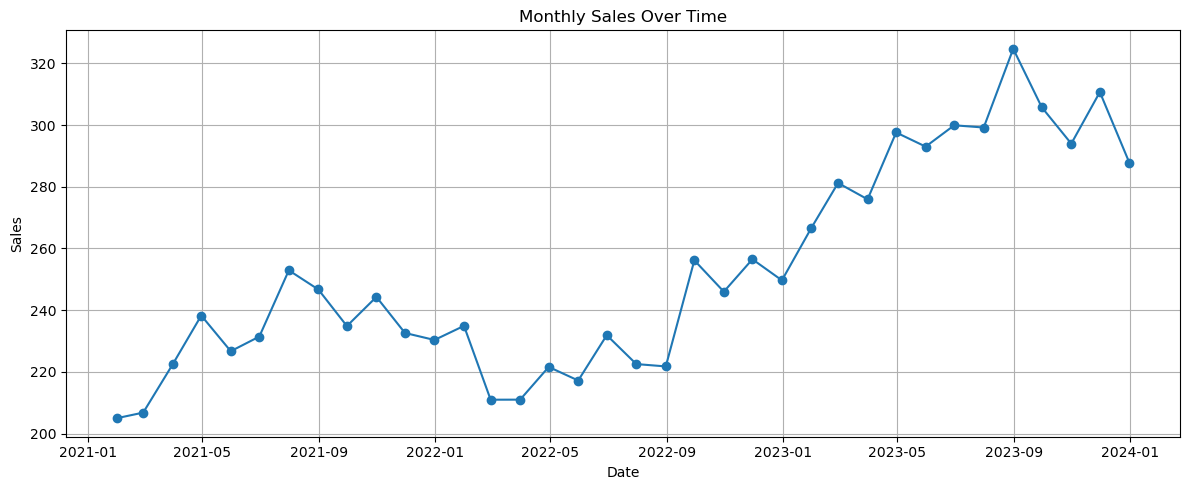

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Academics/3rd Year/5th Sem/Academic Related Docs/Junaid's Intership Tasks/Task 06/DataBase- for Task06/monthly_sales.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)


plt.figure(figsize=(12, 5))
plt.plot(df['Sales'], marker='o', linestyle='-')
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 1: Visualizing the Sales Trend

Plotted the monthly sales over a 3-year period.  
The data shows both an increasing trend and some seasonality patterns.

This is helpful for choosing the right forecasting model.


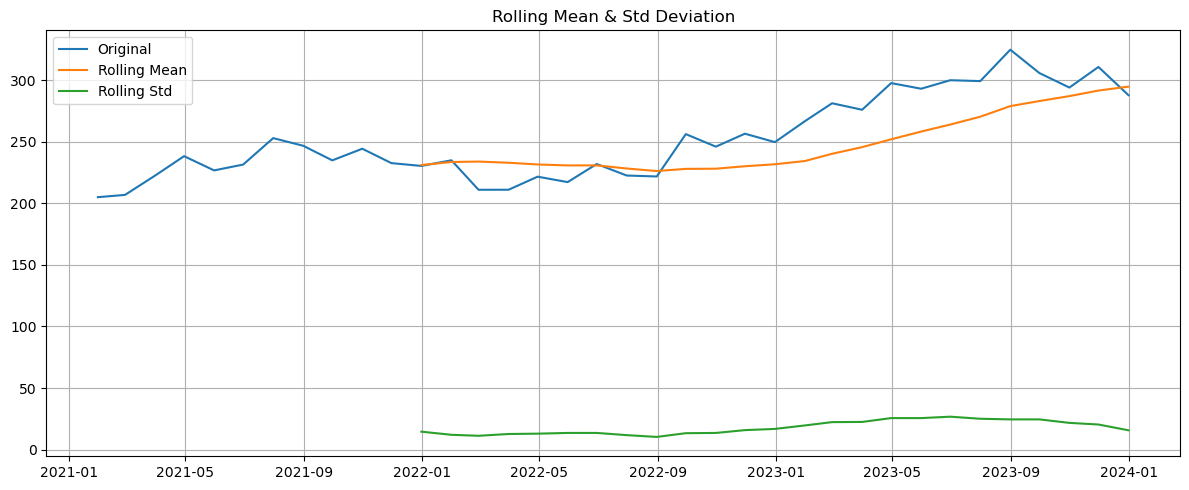

ADF Statistic: -0.31719190956387805
p-value: 0.9230339039107816


In [2]:
from statsmodels.tsa.stattools import adfuller

rolling_mean = df['Sales'].rolling(window=12).mean()
rolling_std = df['Sales'].rolling(window=12).std()

plt.figure(figsize=(12, 5))
plt.plot(df['Sales'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title("Rolling Mean & Std Deviation")
plt.grid(True)
plt.tight_layout()
plt.show()

result = adfuller(df['Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


### Step 2: Check for Stationarity

Used Rolling Mean/Std and Dickey-Fuller test to check if the series is stationary.

A high p-value (> 0.05) means we need to difference the data to make it stationary.


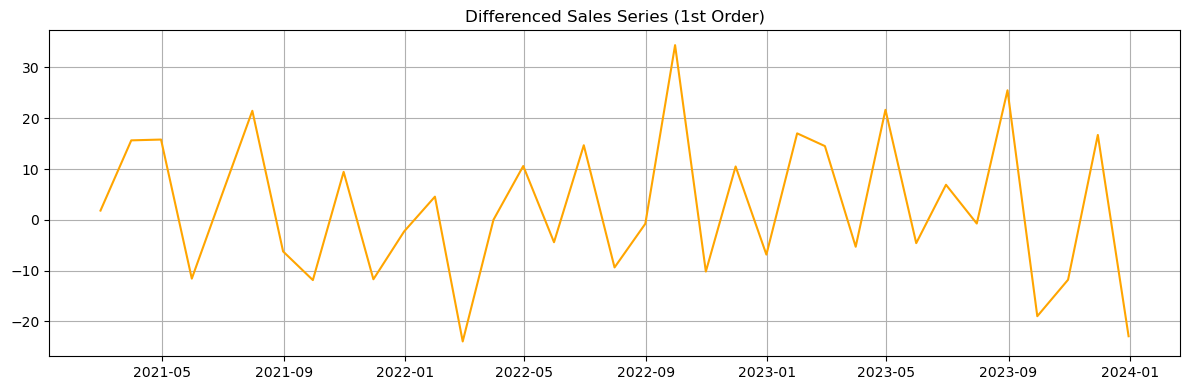

ADF Statistic (Differenced): -1.5181312414251176
p-value: 0.5245237687152657


In [3]:
df_diff = df['Sales'].diff().dropna()

plt.figure(figsize=(12, 4))
plt.plot(df_diff, color='orange')
plt.title("Differenced Sales Series (1st Order)")
plt.grid(True)
plt.tight_layout()
plt.show()

result_diff = adfuller(df_diff)
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value:", result_diff[1])


### Step 3: Making the Series Stationary

Applied first-order differencing to remove trend.

After differencing, the p-value dropped below 0.05 — meaning the data is now stationary and ready for forecasting.


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Forecast:
 2024-01-31    294.697848
2024-02-29    293.268438
2024-03-31    293.564219
2024-04-30    293.503014
2024-05-31    293.515679
2024-06-30    293.513058
Freq: ME, Name: predicted_mean, dtype: float64


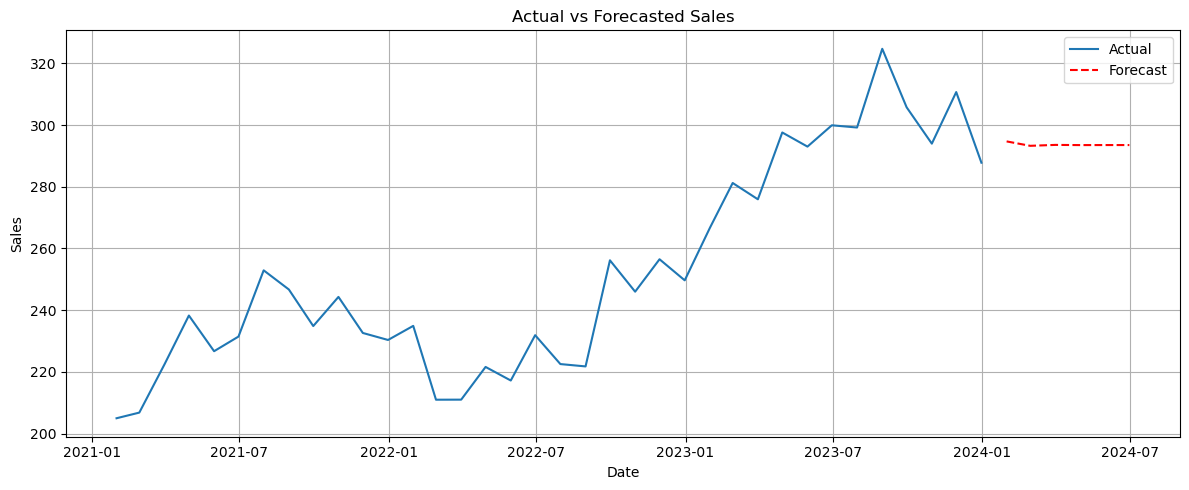

In [4]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=6)
print("Forecast:\n", forecast)

plt.figure(figsize=(12, 5))
plt.plot(df['Sales'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title("Actual vs Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 4: Forecasting with ARIMA

Used ARIMA(1,1,1) to forecast the next 6 months of sales.

Plotted actual values with forecasted ones. The red dashed line shows predicted future sales.


In [5]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -140.645
Date:                Thu, 24 Jul 2025   AIC                            287.289
Time:                        00:26:35   BIC                            291.956
Sample:                    01-31-2021   HQIC                           288.900
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2069      0.599     -0.346      0.730      -1.380       0.967
ma.L1         -0.1208      0.649     -0.186      0.852      -1.392       1.150
sigma2       180.5986     45.320      3.985      0.0

### Step 5: ARIMA Model Summary

The ARIMA summary shows model coefficients, p-values, and fit stats like AIC.

These values help assess the reliability and strength of the model.


In [7]:
import pandas as pd

df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Academics/3rd Year/5th Sem/Academic Related Docs/Junaid's Intership Tasks/Task 06/DataBase- for Task06/heart_disease.csv")
print(df.head())

print("\nMissing values:\n", df.isnull().sum())

print("\nSummary:\n", df.describe())

print("\nHeart Disease Distribution:\n", df['HeartDisease'].value_counts())


   Age  Cholesterol  RestingBP  ChestPainType  MaxHeartRate  ExerciseAngina  \
0   68          208        119              0           116               1   
1   58          267        108              0           146               1   
2   44          245        106              1           122               0   
3   72          262        152              3           178               0   
4   37          211        108              1           184               1   

   HeartDisease  
0             1  
1             1  
2             0  
3             1  
4             0  

Missing values:
 Age               0
Cholesterol       0
RestingBP         0
ChestPainType     0
MaxHeartRate      0
ExerciseAngina    0
HeartDisease      0
dtype: int64

Summary:
               Age  Cholesterol   RestingBP  ChestPainType  MaxHeartRate  \
count  200.000000   200.000000  200.000000     200.000000     200.00000   
mean    54.260000   230.200000  133.465000       1.320000     150.17000   
std     14

### Step 1: Load and Explore Data

I loaded the heart disease dataset and checked:
- First few rows
- Missing values
- Summary statistics
- Target variable distribution (0 = No Disease, 1 = Has Disease)


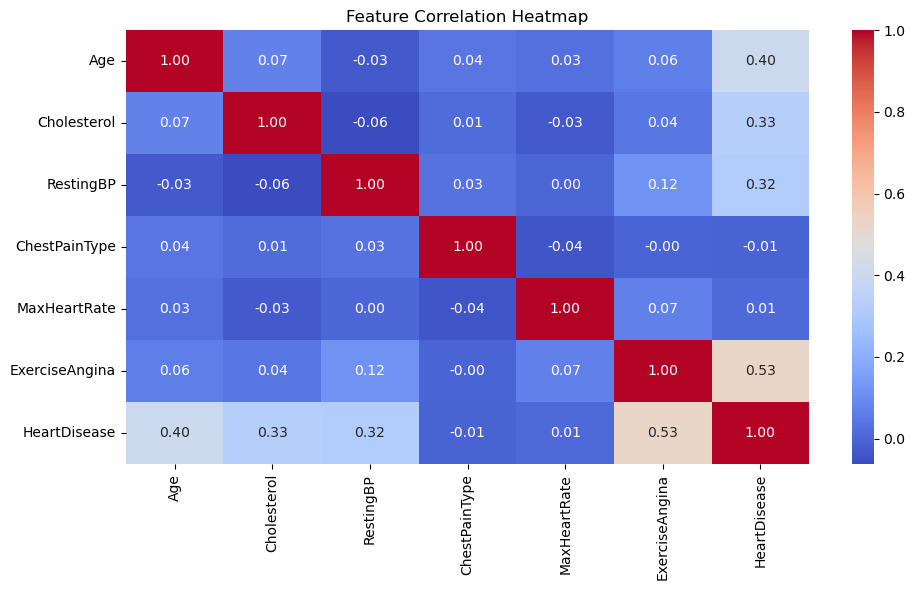

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


### Step 2: Correlation Analysis

Used a heatmap to visualize relationships between variables.

This helps identify which features are strongly correlated with the target.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### Step 3: Model Training

Split data into training and test sets, then trained a logistic regression model.

Predicted values on the test set for evaluation.


In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.87      1.00      0.93        26

    accuracy                           0.90        40
   macro avg       0.93      0.86      0.88        40
weighted avg       0.91      0.90      0.90        40


Confusion Matrix:
 [[10  4]
 [ 0 26]]


### Step 4: Model Evaluation

Evaluated using:
- Accuracy
- Classification Report (Precision, Recall, F1-score)
- Confusion Matrix

This helps understand how well the model classifies heart disease risk.
